In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
try:
    hypothesis = pd.read_csv(r'C:\all\Study\Practicum\Module_2\Принятие решений в бизнесе\project\hypothesis.csv')
    orders = pd.read_csv(r'C:\all\Study\Practicum\Module_2\Принятие решений в бизнесе\project\orders.csv')
    visitors = pd.read_csv(r'C:\all\Study\Practicum\Module_2\Принятие решений в бизнесе\project\visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Описание проекта
### Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.

## Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
hypothesis.columns = ['hypothesis','reach','impact','confidence','efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis['ICE'] =  (
    ( hypothesis['impact'] * hypothesis['confidence'] ) / hypothesis['efforts']
)
hypothesis.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Используя метод ICE, по убыванию расположились следующие гипотезы: 8,0,7

## Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] =  (
    ( hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] ) / hypothesis['efforts']
)
hypothesis.sort_values(by='RICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Используя метод RICE, по убыванию расположились следующие гипотезы: 7,2,0

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При применении метода RICE высший приоритет оказался у гипотезы под номером 7, которая при при применении метода ICE была лишь на 3-м месте. Случилось это из-за параметра Reach (охват), который у гипотезы под номером 7 составляет целых 10 единиц. </p>
Гипотеза под номером 8, которая заняла первую строку при применении метода ICE, спустилась на 5-ую позицию. Поскольку её показатель Reach составил лишь 1.

<div class="alert alert-block alert-info">
    
### Комментарий студента_V1: 

Первая по приоритету гипотеза по методу ICE - Запустить акцию, дающую скидку на товар в день рождения. Но поскольку данная гипотеза затрагивает лишь небольшое количество пользователей, по методу RICE (который учитывает и количество пользователей на которых повлияет изменение) она покидает первое место по приоритету.
Первая по приоритету гипотеза по методу RICE -  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Затрагивает Всех пользователей, обладает показателями impact, confidence 7,8 соответственно, поэтому и выбралась эта гипотеза на первое место по приоритету. 

</div>

# Часть 2. Анализ A/B-теста


In [7]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Проверка на явные дубликаты

In [9]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

### Проверю правильно ли были распределены пользователи на группы. Посмотрю, чтобы не было одинаковых visitorId в группах.

In [10]:
checkA = orders.query('group == "A"')['visitorId']

In [11]:
checkB = orders.query('group == "B"')['visitorId']

In [12]:
intersection = set (checkA) & set (checkB)
len(intersection)

58

In [13]:
intersection

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

### Есть такие пользователи, уберу их из теста.

In [14]:
orders = orders.query('visitorId not in @intersection')

In [15]:
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,445
B,528


### Получилось, что в группах разное количество человек. Группа А составляет 46% от общего количества visitorId, группа Б составляет 54%. </p> Произошло некорректное деление трафика теста. (Но я не знаю что с этим делать, другие данные то не взять)


### Подготовка данных

In [16]:
visitorsADaily = visitors.query('group == "A"')[['date','visitors']]
visitorsADaily.columns = ['date','visitorsPerDateA']
visitorsADaily

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756
5,2019-08-06,667
6,2019-08-07,644
7,2019-08-08,610
8,2019-08-09,617
9,2019-08-10,406


In [17]:
visitorsBDaily = visitors.query('group == "B"')[['date','visitors']]
visitorsBDaily.columns = ['date','visitorsPerDateB']
visitorsBDaily

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707
36,2019-08-06,655
37,2019-08-07,709
38,2019-08-08,654
39,2019-08-09,610
40,2019-08-10,369


In [18]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318
5,2019-08-06,3985
6,2019-08-07,4629
7,2019-08-08,5239
8,2019-08-09,5856
9,2019-08-10,6262


In [19]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280
36,2019-08-06,3935
37,2019-08-07,4644
38,2019-08-08,5298
39,2019-08-09,5908
40,2019-08-10,6277


In [20]:
orders.columns = ['orderId','userId','date','revenue','group']

<div class="alert alert-block alert-info">
    
### Комментарий студента_V1: 

Было:
<code>
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'userId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily
</code>
Стало:
</div>


In [21]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383
5,2019-08-06,15,40919
6,2019-08-07,16,123248
7,2019-08-08,14,88639
8,2019-08-09,11,134237
9,2019-08-10,15,152275


In [22]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908
5,2019-08-06,23,214842
6,2019-08-07,23,219164
7,2019-08-08,22,150141
8,2019-08-09,19,103166
9,2019-08-10,22,105162


In [23]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413
5,2019-08-06,114,515332
6,2019-08-07,130,638580
7,2019-08-08,144,727219
8,2019-08-09,155,861456
9,2019-08-10,170,1013731


In [24]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648
5,2019-08-06,112,690490
6,2019-08-07,135,909654
7,2019-08-08,157,1059795
8,2019-08-09,176,1162961
9,2019-08-10,198,1268123


In [25]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

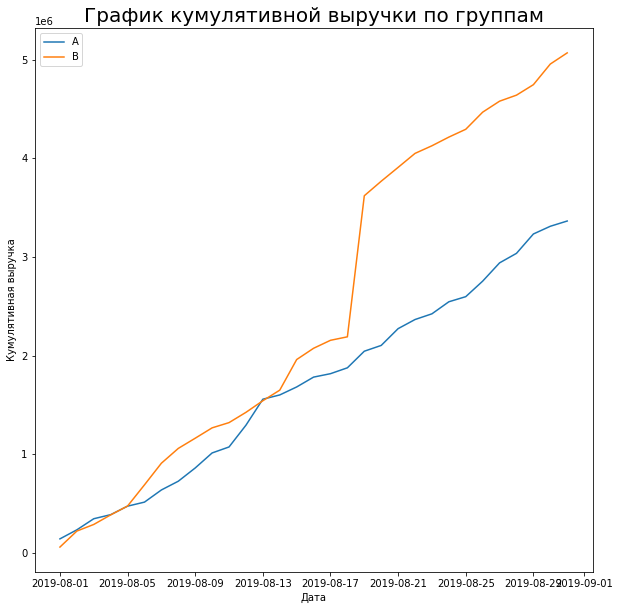

In [26]:
plt.figure(figsize=(10, 10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10) 

plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'], label='A')
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB'], label='B')
plt.title("График кумулятивной выручки по группам")
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend() 
plt.show()

Из графика можно сказать, что до 2019-08-05 выручка росла одинаково. </p>
С 2019-08-05 по 2019-08-13 были различия. Кумулятивная выручка группы Б увеличиливалась больше, чем группы А. </p>
2019-08-13 график снова сошёлся. </p>
После 2019-08-13 график был поход на период с 2019-08-05 по 2019-08-13, но в дату 2019-08-18 случился резкий скачок Кумулятивной выручки группы Б. </p>
Вывод: В некоторые моменты кумулятивная выручка Группы Б была больше, чем у группы А.Надо разобраться с чем связан скачок, возможно удалить эти данные и посмотреть на ещё раз.</p>
Предположение: По кумулятивной выручке группа Б выглядит лучше.

<div class="alert alert-block alert-info">

### Комментарий студента_V1: 

Сделано

</div>

### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

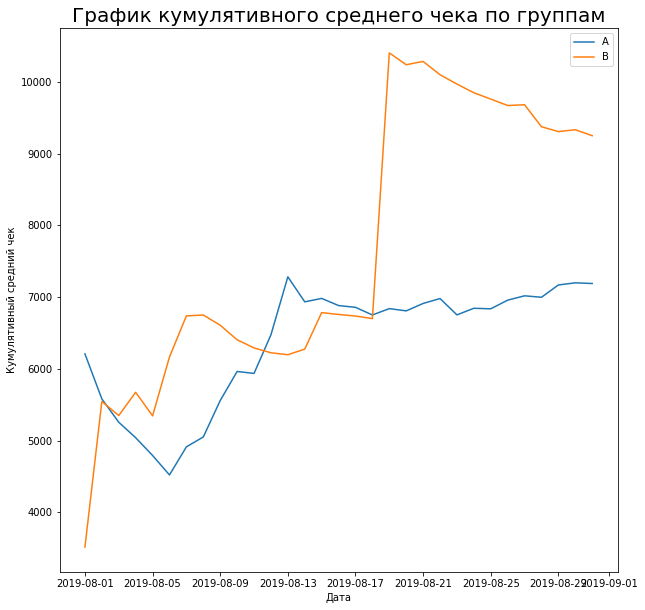

In [27]:
plt.figure(figsize=(10, 10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)

plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA'], label='A')
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB'], label='B')
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.show()

По графику кумулятивного среднего чека, выглядит лучше группа Б.</p>
Если убрать скачок у группы Б, то возможно, по кумулятвному среднему чеку график А будет лежать выше, поскольку после резкого повышения графика группы Б, он продолжает идти вниз.

### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

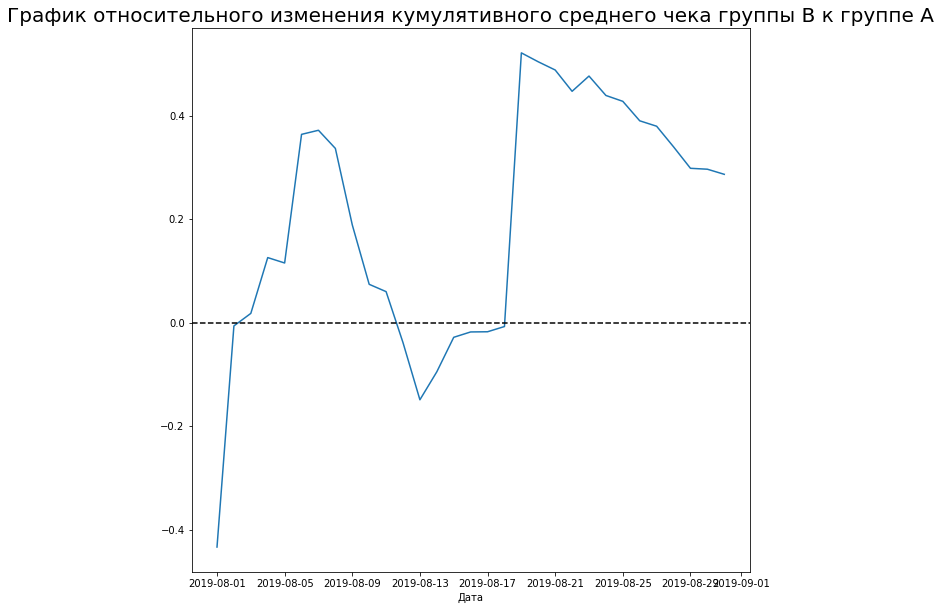

In [28]:
plt.figure(figsize=(10, 10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)
plt.plot(ordersACummulative['date'], \
         (ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB'])/ 
         (ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы В к группе А")
plt.xlabel('Дата')
plt.show()

В период с 2019-08-04 по 2019-08-11 кумулятивный средний чек группы Б был больше, чем группы А. После чего, до 2019-08-18 чек был больше у группы А. ПОсле этого чек группы Б улетел в небеса (видимо какая-то Очень крупная покупка). 
Но отношение ЧекБ/ЧекА, судя по концу графика, стремится уменьшиться.

### 4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

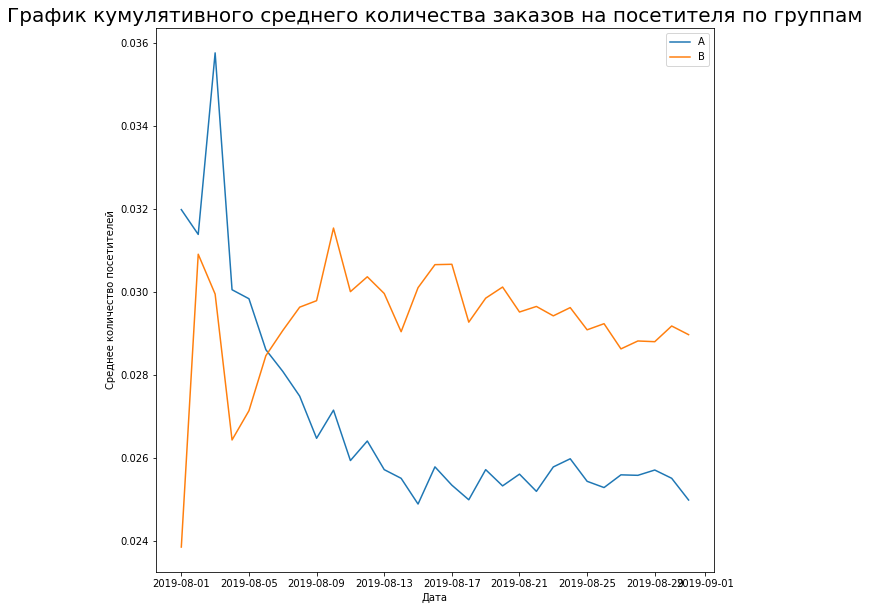

In [29]:
plt.figure(figsize=(10, 10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label='B')
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel('Дата')
plt.ylabel('Среднее количество посетителей')
plt.legend() 
plt.show()

Скачок у обеих групп в начале эксперимента, почти сразу низкий спад. </p>
Спад показателя группы А продолжился, в то же время Показатель группы Б снова начал расти. </p>
После чего показатели перестали претерпевать сильных изменений. </p>
Группа Б лидирует в данном показателе.

### 5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

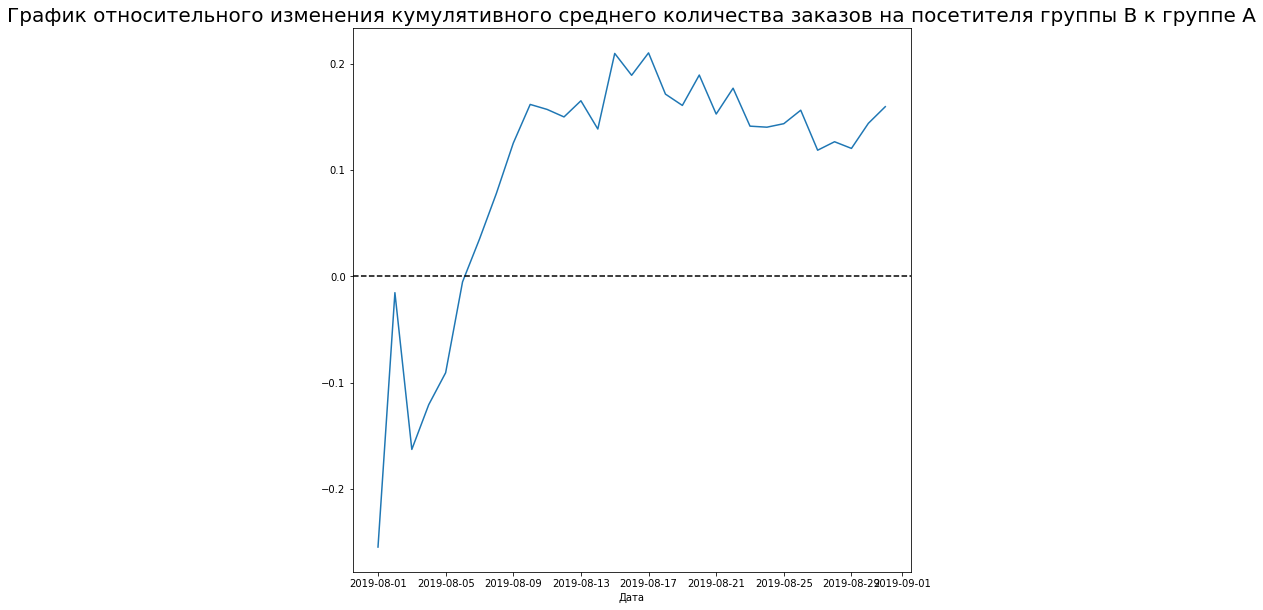

In [30]:
plt.figure(figsize=(10, 10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)
plt.plot(data['date'], ((data['ordersCummulativeB'] / data['visitorsCummulativeB']) / (data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1), label='A')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xlabel('Дата')
plt.show()

Есть лишь небольшой отрезок времени, когда кумулятивный показатель среднего количества заказов на поситетеля группы А больше этого же показателя группы Б.

### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

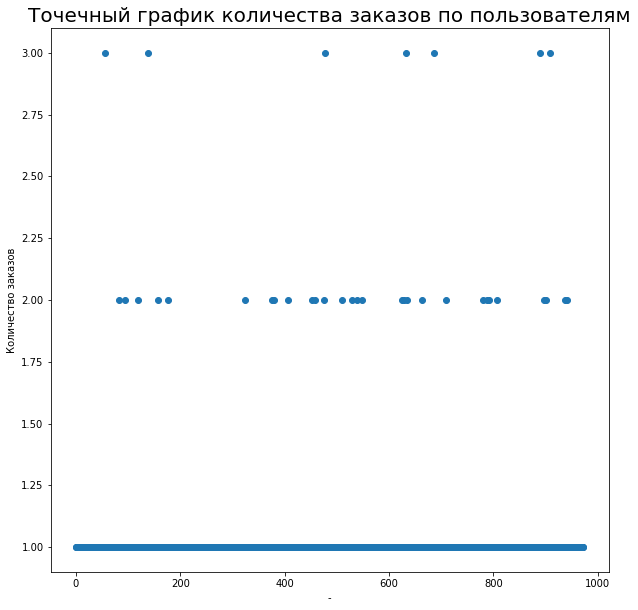

In [31]:
ordersByUsers = (
    orders.groupby('userId',as_index=False)
    .agg({'orderId':'nunique'})
)
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)
plt.scatter(x=x_values,y=ordersByUsers['orderId'])
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel('-')
plt.ylabel('Количество заказов')
plt.show()

Основная часть людей делала лишь 1 заказ, редко по 2 заказа, ещё реже 3 заказа.

### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [32]:
np.percentile(ordersByUsers['orderId'], [95,99])

array([1., 2.])

Границу выбираю 1 заказ.

### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

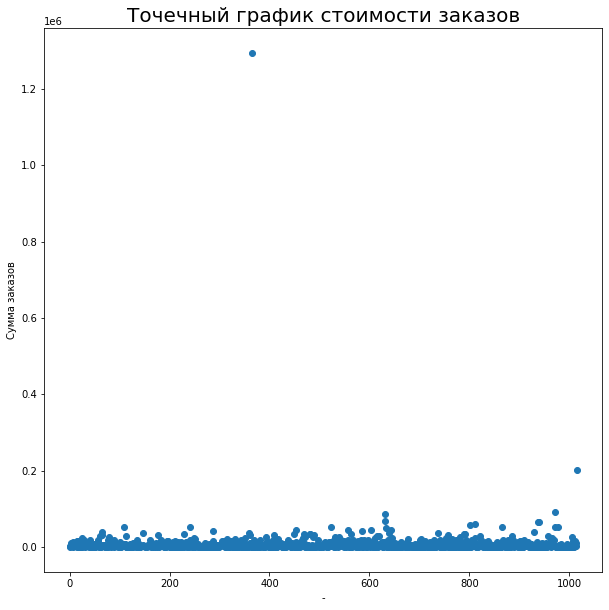

In [33]:

x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)
plt.scatter(x=x_values,y=orders['revenue'])
plt.title("Точечный график стоимости заказов")
plt.xlabel('-')
plt.ylabel('Сумма заказов')
plt.show()

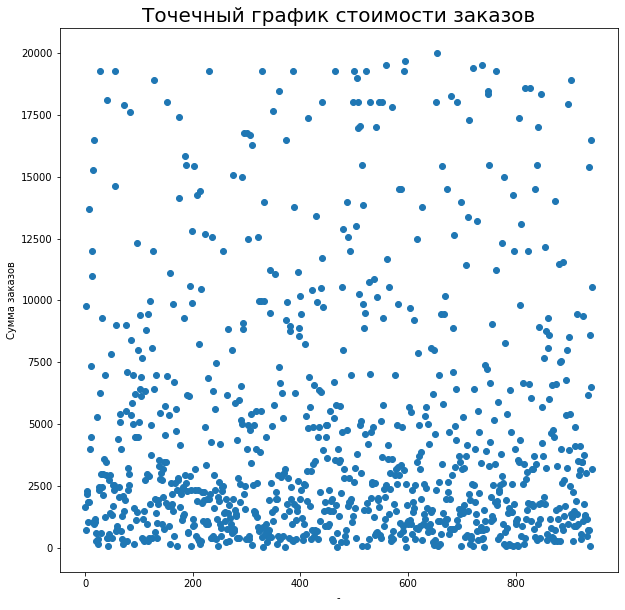

In [34]:

x_values = pd.Series(range(0, len(orders.query('revenue < 20000'))))
plt.figure(figsize=(10,10))
plt.rc('axes', titlesize= 20 ) 
plt.rc('xtick', labelsize= 10 ) 
plt.rc('ytick', labelsize= 10)
plt.scatter(x=x_values,y=orders.query('revenue < 20000')['revenue'])
plt.title("Точечный график стоимости заказов")
plt.xlabel('-')
plt.ylabel('Сумма заказов')
plt.show()

<div class="alert alert-block alert-info">

### Комментарий студента_V1: 

Наиболее плотная часть по стоимости заказа лежит в границах от 0 до ~ 3500.

</div>

Основная часть заказов ниже ~0.05 * 1e6. Один заказ около 0.2 * 1e6. Один заказ больше 1.2 * 1e6 (тот самый, который резко уводил *денежные* графики вверх)

### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [35]:
np.percentile(orders['revenue'], [95,99])

array([26785., 53904.])

95-й перцентиль равен 26785. Его и возьму за границу аномальных заказов.

### 10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
Нулевая гипотеза Н0 - различий в среднем количестве заказов на посетителя между группами А и Б нет. </p>
Альтернативная гипотеза Н1 - различия есть.

</div>

In [36]:
ordersByUsersA = (
    orders.query('group == "A"')
    .groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsersA.columns = ['userId','orders']
ordersByUsersB = (
    orders.query('group == "B"')
    .groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsersB.columns = ['userId','orders']

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [38]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


0.01102


P-value < 0.05 => Есть статистически значимые отличия между группами.

<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
Добавил ниже

</div>

In [39]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.160


<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
Относительный прирост группы Б в среднем количестве заказов = 16%
ПРоцент достаточно большой, что подтверждает результат теста о стат.значимости.

</div>

### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
Нулевая гипотеза Н0 - различий в среднем чеке между группами А и Б нет.

Альтернативная гипотеза Н1 - различия есть.

</div>

In [40]:
sampleA = orders.query('group == "A"')['revenue']
sampleB = orders.query('group == "B"')['revenue']
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.829


In [41]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.287


<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
ОТносительный прирост группы Б в среднем чеке = 28.7% </p>
Огромная цифра! При этом я отвергаю нулевую гипотезу. Возможно дело в том, что данные *сырые* посмотрим что будет после их *очистки*

</div>

P-value > 0.05 => Нет статистически значимых отличий между группами. Не отвергаем нулевую гипотезу.

### 12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [42]:
filter_count_order = np.percentile(ordersByUsers['orderId'], [95,99])[0]
filter_count_order

1.0

In [43]:
filter_count_revenue = np.percentile(orders['revenue'], [95,99])[0]
filter_count_revenue

26785.0

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > filter_count_order]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > filter_count_order]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > filter_count_revenue]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers

568      113298937
1099     148427295
928      204675465
33       249864742
684      358944393
36       366673373
648      382846391
51       406208401
67       522292794
58       611059232
64       678354126
751      689129267
72       759473111
77       787824685
654      816783716
339      834731816
949      887908475
744      888512513
563      935349363
709      950626008
551     1010866419
1103    1164614297
137     1211585711
1136    1307669133
421     1357170471
549     1367935136
176     1404560065
562     1452540367
1121    1604853044
1038    1605520752
420     1606766439
171     1617417821
208     1637811943
180     1772171838
425     1920142716
250     1985475298
256     2025197455
265     2096506107
1196    2108080724
211     2108163459
227     2232111114
570     2247666522
287     2254456485
131     2254586615
1006    2261934787
273     2278620397
755     2279926127
239     2306096143
296     2366521417
303     2397843657
1142    2606908679
279     2706377257
282     2733

<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
Сделано

</div>


<div class="alert alert-block alert-info">

### Комментарий студента_V1: 

Нулевая гипотеза Н0 - различий в среднем количестве заказов на посетителя между группами А и Б нет.

Альтернативная гипотеза Н1 - различия есть.

</div>

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.01593


P-value < 0.05 => Есть стат.значимость. (как и в случае с сырыми данными) 

In [47]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.174


<div class="alert alert-block alert-info">

### Комментарий студента_V1: 
    
Процент стал ещё больше - 17.4 %

</div>

### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


<div class="alert alert-block alert-info">

### Комментарий студента_V1: 

Нулевая гипотеза Н0 - различий в среднем чеке между группами А и Б нет.

Альтернативная гипотеза Н1 - различия есть.

</div>

In [48]:
p_value = stats.mannwhitneyu(orders.query('group == "A" and ~(userId.isin(@abnormalUsers))')['revenue'] \
                   ,orders.query('group == "B" and ~(userId.isin(@abnormalUsers))')['revenue'])[1]
round(p_value,3)

0.727

P-value > 0.05 => Нет статистически значимых отличий между группами.

In [49]:
diff = (orders.query('group == "A" and ~(userId.isin(@abnormalUsers))')['revenue'].mean() \
                   / orders.query('group == "B" and ~(userId.isin(@abnormalUsers))')['revenue'].mean()) - 1
round(diff,3)

0.035

<div class="alert alert-block alert-info">

Как я и предполагал, дело было в данных, уходящих за 95-й перцентиль.
Теперь разница составляет лишь 3.5 %.

</div>

### 14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Есть статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным и по «очищенным» данным. </p>
По сырым данным нет статистически значимого различия по среднему чеку между группами. Нет статистического значимого различия и после удаления аномалий. </p>
График различия кумулятивного среднего количества заказов на посетителя показал, что результаты группы Б лучше группы А. </p>
Цель теста была увеличить выручку. Выручка = средний чек * количество заказов. В ходе теста я выяснил, что значимого различия по среднему чеку между группами нет, но есть между количеством заказов на посетителя(в пользу группы Б). Из этого можно сделать вывод что и Выручка выросла. </p>
Поэтому я рекомендую остановить тест, зафиксировать победу группы Б.

<div class="alert alert-block alert-info">

В принципе, основные выводы остались такие же.
</div>